In [3]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np

In [4]:
class perceptron_layer:

    def __init__(self, no_input, no_output, lr, act_func, act_deriv_given_act):
        self.lr = lr
        self.params = np.random.rand(no_output, no_input + 1)
        self.activation_function = act_func
        self.activation_derivative_given_activation = act_deriv_given_act
        print(self)

    def evaluate(self, inputs):
        #return self.params * inputs.append(1)
        inputs = np.append(inputs, [1]).T
        self.activations = inputs
        output = self.activation_function(np.dot(self.params, inputs))
        return output

    def __repr__(self):
        return repr(self.params)

    def training_forward(self, inputs):
        inputs = np.append(inputs, [1]).T
        self.activations = inputs
        self.z = z = np.dot(self.params, inputs)
        self.a = output = self.activation_function(z)
        return output

    def error_previous_layer(self, delta_l_plus_1):
        #δl=((wl+1)Tδl+1)⊙σ′(zl)
        inputs = self.activations
        first = np.dot(self.params.T, delta_l_plus_1)
        delta_l = first * self.activation_derivative_given_activation(inputs)
        #∂C/∂wljk=al−1k * δlj
        nudge = self.lr * np.outer(delta_l_plus_1, inputs)
        self.params += nudge
        return delta_l[:-1]

    def reset(self):
        self.params = np.random.rand(self.params.shape[0], self.params.shape[1])

In [5]:
def sigmoid(arr):
    return 1 / (1 + np.exp(-arr))

def sigmoid_derivative_given_sigmoid_x(x):
    return (x) * (1 - (x))

In [6]:
class neural_network:

    def __init__(self, lr, dims,
                 act_func = sigmoid,
                 act_deriv_given_act = sigmoid_derivative_given_sigmoid_x,
                 output_act = sigmoid,
                 output_deriv = sigmoid_derivative_given_sigmoid_x
                 ):
        #self.lr = lr
        self.layers = []
        for i in range(len(dims) - 2):
            self.layers.append(perceptron_layer(dims[i], dims[i + 1], lr, act_func, act_deriv_given_act))
        self.layers.append(perceptron_layer(dims[-2], dims[-1], lr, output_act, output_deriv))
        pass

    def evaluate(self, inputs):
        activations = inputs
        for layer in self.layers:
            activations = layer.evaluate(activations)
            pass
        return activations

    def delta_last_layer(self, expected, predicted):
        return (expected - predicted) * sigmoid_derivative_given_sigmoid_x(predicted)

    def cost_function(self, output, predicted):
        return 0.5 *(output - predicted) ** 2

    def reset(self):
        for layer in self.layers:
            layer.reset()

    def train_once(self, inputs, expected):
        predicted = self.evaluate(inputs)
        cost = delta = self.delta_last_layer(expected, predicted)
        for layer in self.layers[::-1]:
            delta = layer.error_previous_layer(delta)
        return 0.5 * (cost ** 2).sum()

    def __repr__(self):
        return '\n'.join([repr(layer) for layer in self.layers])

    def train(self, epochs = 10000, data = []):
        error_rate = []
        weight_updation = []
        output = [[] for i in range(8)]
        cost = 0
        self.reset()
        for i in range(1, 1 + epochs):
            for ip, op in data:
                y_hat = self.evaluate(ip)
                output[int(''.join(map(str, ip)), 2)].append(y_hat)
                costx = self.train_once(ip, op)
                cost += costx
            error_rate.append(cost / float(i))
            weight_updation.append(self.layers[0].params[0][0])
        cost = 0
        for ip, op in data:
            y_hat = self.evaluate(ip)
            print(ip, y_hat)
            cost += self.cost_function(op, y_hat)
        print(self)
        print("Error =", cost / data.size)
        return error_rate, weight_updation, output


In [7]:
epochs = 10000

# 3 input XOR gate is being modelled
I shall hard code all the training data for now, since I have it typed out already for testing

In [8]:
data = np.array([[[0, 0, 0], [0]], [[0, 0, 1], [1]], [[0, 1, 0], [1]], [[0, 1, 1], [0]], [[1, 0, 0], [1]], [[1, 0, 1], [0]], [[1, 1, 0], [0]], [[1, 1, 1], [1]]], dtype=object)

In [9]:
learning_rates = [2.5, 1.5, 1, 0.9, 0.5, 0.1, 0.01]

In [10]:
error_rates, weight_updations, outputs = [], [], []

In [11]:
def repeat(epoch):
    global error_rates, weight_updations, outputs
    error_rates, weight_updations, outputs = [], [], []
    for lr in learning_rates:
        print("lr = ", lr)
        nn = neural_network(lr, [3, 2, 1])
        error_rate, weight_updation, output = nn.train(epoch, data)
        error_rates.append(error_rate)
        weight_updations.append(weight_updation)
        outputs.append(output)


In [12]:
def plot():
    plt.clf()
    fig, (ax1, ax2) = plt.subplots(2, figsize=(5, 7))
    for i in range(len(learning_rates)):
        ax1.plot(error_rates[i], label=learning_rates[i])
        ax1.set(adjustable='box')
        ax1.set_ylabel('Error rate')
        ax2.plot(weight_updations[i], label=learning_rates[i])
        ax2.set_ylabel('Weight updation of w00')
        ax2.set(adjustable='box')
    plt.xlabel('Number of epochs')
    plt.legend(loc='center left', bbox_to_anchor=(1, 1))
    plt.show()

In [13]:
repeat(epochs)


lr =  2.5
array([[0.41503998, 0.0074806 , 0.90401768, 0.79078111],
       [0.8895101 , 0.87819302, 0.55457796, 0.21104172]])
array([[0.25981126, 0.50142647, 0.75554237]])
[0, 0, 0] [0.0070094]
[0, 0, 1] [0.99206299]
[0, 1, 0] [0.99212849]
[0, 1, 1] [0.25819989]
[1, 0, 0] [0.99324499]
[1, 0, 1] [0.25823728]
[1, 1, 0] [0.25822256]
[1, 1, 1] [0.25818119]
array([[-9.55680886, -9.62766682, -9.67599735, 10.70205986],
       [-6.23717746, -6.18814962, -6.29360395,  3.42789904]])
array([[  8.96436337, -13.27963371,  -1.0554405 ]])
Error = [0.02345461]
lr =  1.5
array([[0.22895264, 0.6078905 , 0.17442172, 0.36146833],
       [0.6731158 , 0.51742083, 0.44739346, 0.74967842]])
array([[0.88166692, 0.74732332, 0.89920777]])
[0, 0, 0] [0.00947446]
[0, 0, 1] [0.99045852]
[0, 1, 0] [0.99059804]
[0, 1, 1] [0.25557323]
[1, 0, 0] [0.99133169]
[1, 0, 1] [0.25559726]
[1, 1, 0] [0.25560015]
[1, 1, 1] [0.25522879]
array([[-9.01296068, -9.06003256, -9.08652185, 10.02350137],
       [-6.36892465, -6.36225626, 

<Figure size 640x480 with 0 Axes>

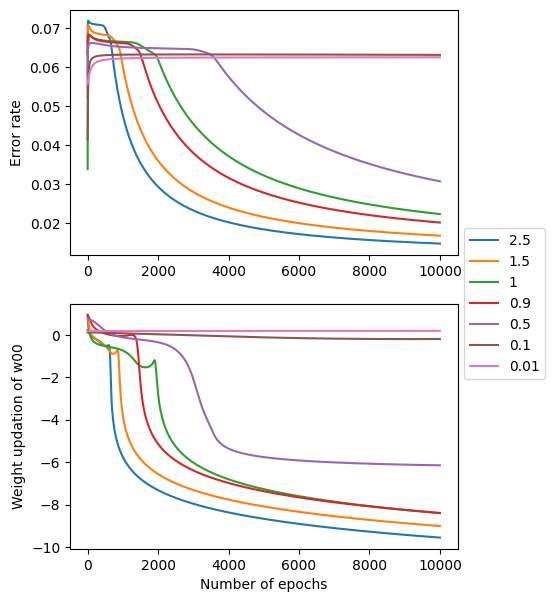

In [14]:
plot()

<h4> as can be inferred from the above, 10,000 iterations are not enough for any learning rate to reduce the error below 0.02 and converge the output for last three cases </h4>
<h4> therefore, I am increasing the number of iterations to 20,000 </h4>

In [15]:
repeat(2 * epochs)


lr =  2.5
array([[0.76061072, 0.26412208, 0.15906303, 0.83483049],
       [0.68608818, 0.45095673, 0.92837114, 0.33718719]])
array([[0.48682329, 0.54420701, 0.93902779]])
[0, 0, 0] [0.02391506]
[0, 0, 1] [0.98470138]
[0, 1, 0] [0.98495846]
[0, 1, 1] [0.01447503]
[1, 0, 0] [0.98532101]
[1, 0, 1] [0.01485095]
[1, 1, 0] [0.01515796]
[1, 1, 1] [0.97579736]
array([[-10.81433609, -10.77771619, -10.67029514,  15.95259181],
       [ -1.52915248,  -1.5253497 ,  -1.52151599,   2.28425431]])
array([[ 21.45476991, -35.3789097 ,   6.94483615]])
Error = [7.79158456e-05]
lr =  1.5
array([[0.14505692, 0.54070088, 0.66680701, 0.74870083],
       [0.31407733, 0.4665627 , 0.76761234, 0.72078493]])
array([[0.83994176, 0.5521781 , 0.95558197]])
[0, 0, 0] [0.03636646]
[0, 0, 1] [0.97674276]
[0, 1, 0] [0.97718403]
[0, 1, 1] [0.02187654]
[1, 0, 0] [0.97780809]
[1, 0, 1] [0.02250908]
[1, 1, 0] [0.02299318]
[1, 1, 1] [0.96333545]
array([[ -1.52963223,  -1.52508258,  -1.5211271 ,   2.28369472],
       [-10.28313

<Figure size 640x480 with 0 Axes>

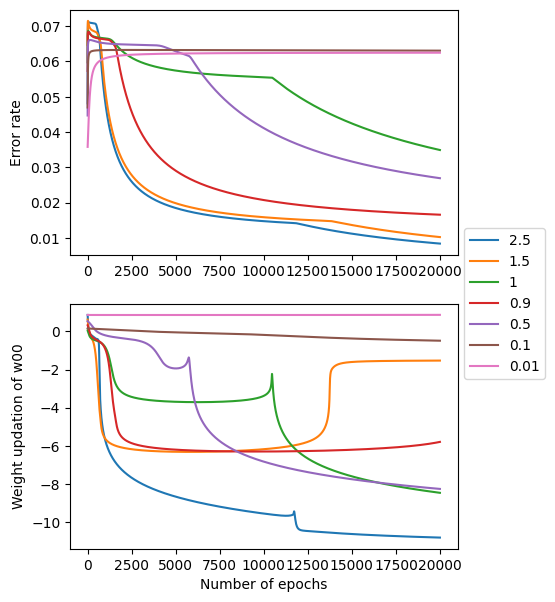

In [16]:
plot()

<h4> As can be seen, learning rate 2.5 performs the best with final error of less than 1e-5.
Therefore, I shall plot the predicted outputs for each of the 8 possible inputs for each iteration </h3>

In [17]:
def output_plot(index):
    for i in range(len(outputs[index])):
        plt.plot(outputs[index][i], label=f"ip:{data[i][0]}, op:{data[i][1]}")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

The below plot is for lr=2.5

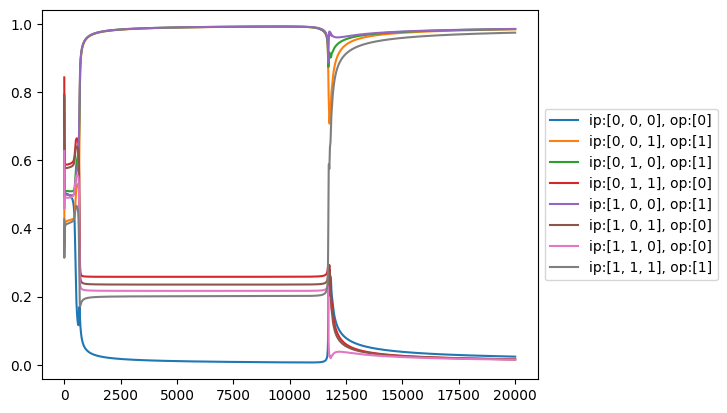

In [18]:
output_plot(0)

This plot is for lr=1.5

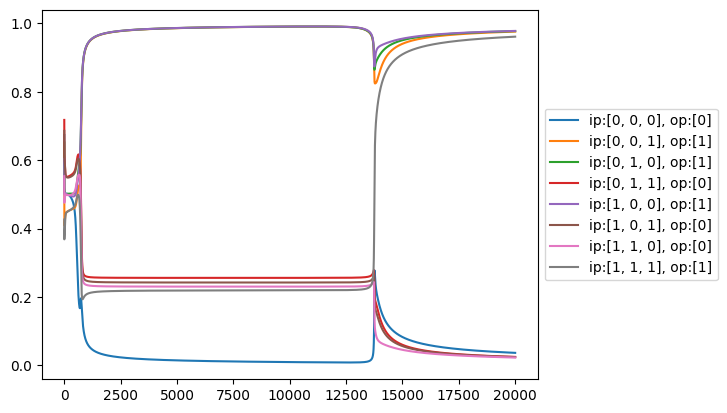

In [19]:
output_plot(1)

<h4> Both plots clearly show a sudden change in the predicted output after certain number of iterations. for lr = 2.5, it happens at just over 11,000. for lr = 1.5, it happens at around 13,500. Before that both mysteriously predict around 0.25 for bottom 5 inputs regardless of output and remain consistent in that. <br> Suddenly after a treshold, they converge to correct output. This change occurs earlier for lr = 2.5 and almost 2,500 iterations later for lr = 1.5. This mysterious behavior is a very good example at showing why it is hard to understand the inner workings of a machine learning model. </h4>

I'll try with higher lrs

In [20]:
learning_rates = [5, 4, 3]

In [21]:
repeat(2 * epochs)

lr =  5
array([[0.04319616, 0.4117654 , 0.54349522, 0.92367485],
       [0.0139188 , 0.37732798, 0.87662437, 0.1259238 ]])
array([[0.1137819 , 0.93961964, 0.43557096]])
[0, 0, 0] [0.01541337]
[0, 0, 1] [0.99018109]
[0, 1, 0] [0.99034486]
[0, 1, 1] [0.00926998]
[1, 0, 0] [0.99056256]
[1, 0, 1] [0.00953446]
[1, 1, 0] [0.00974611]
[1, 1, 1] [0.9843602]
array([[ -1.5428236 ,  -1.5381143 ,  -1.53418634,   2.305178  ],
       [-12.27198698, -12.05751741, -11.79634589,  17.86763385]])
array([[-39.12425534,  23.74370116,   7.67519282]])
Error = [3.22718338e-05]
lr =  4
array([[0.65024059, 0.11582139, 0.3751971 , 0.93636645],
       [0.03408981, 0.13027118, 0.32667746, 0.88493   ]])
array([[0.31788555, 0.65814209, 0.17129532]])
[0, 0, 0] [0.01870126]
[0, 0, 1] [0.98805559]
[0, 1, 0] [0.98825892]
[0, 1, 1] [0.01120038]
[1, 0, 0] [0.98856683]
[1, 0, 1] [0.01153976]
[1, 1, 0] [0.01182957]
[1, 1, 1] [0.98116099]
array([[-11.59684324, -11.49140382, -11.19474206,  16.95070704],
       [ -1.53660129, 

<Figure size 640x480 with 0 Axes>

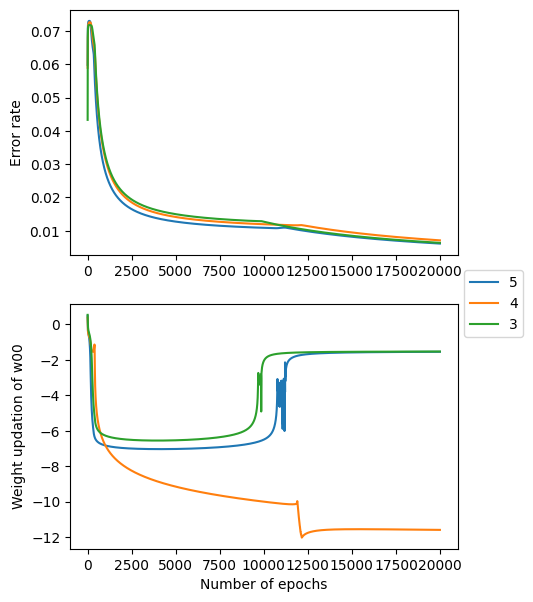

In [22]:
plot()

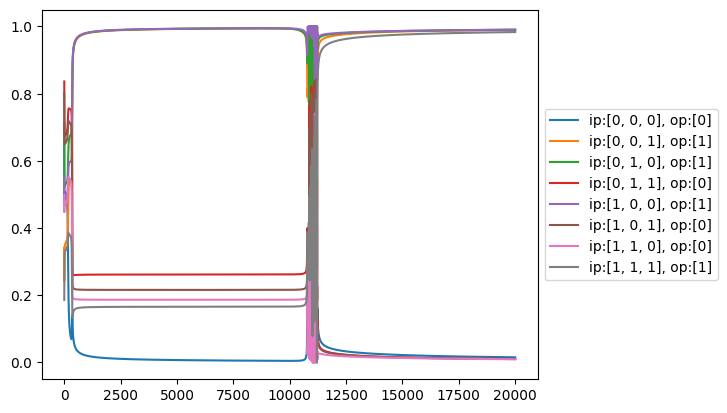

In [26]:
output_plot(0)

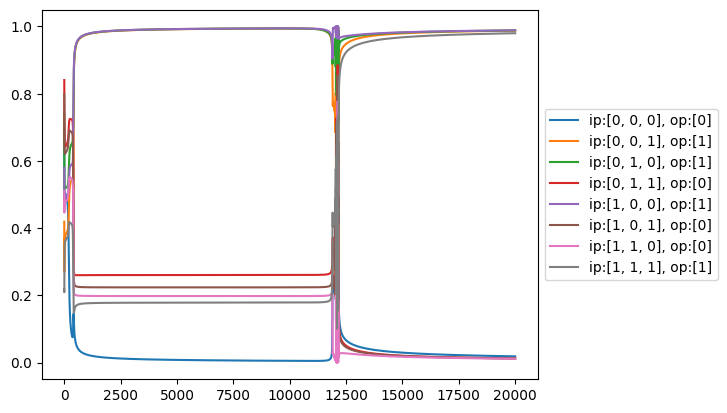

In [25]:
output_plot(1)

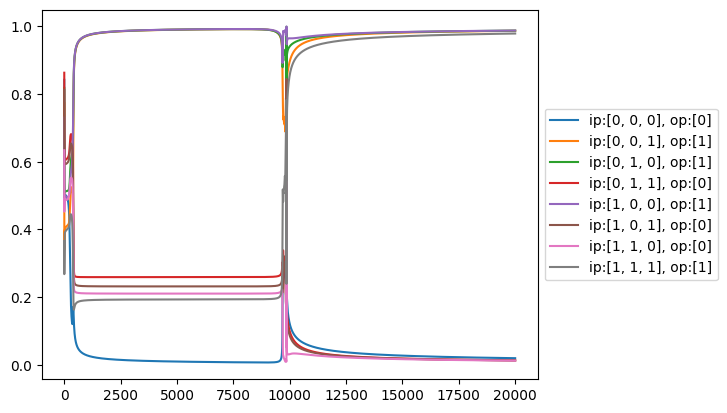

In [27]:
output_plot(2)

<h3> It feels like lr=3 works best for both error rate and early convergence of the the bottom half outputs. The error marginally increases for lr 4 and 5 and the convergence happens later and is oscillating more and more which is not seen in lesser lrs. For lr < 1.5, the outputs don't converge upto 20,000 iterations</h3>

<h3> It is counterproductive to visulaize desicion boundary for 3 input networks since 3d plotting and interpreting it is no easy task. </h3>